# Importing Libraries

In [7]:
import pandas as pd
import numpy as np
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler , Normalizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from scipy.stats import norm
from scipy import stats
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Loading Data

In [81]:
# df = pd.read_csv("../input/covid19-symptoms-checker/Cleaned-Data.csv")
df = pd.read_csv("./classfication/Cleaned-Data.csv")

pd.pandas.set_option('display.max_columns',None)

# EDA

## `Getting to know data`

In [82]:
display("Peeking into Data", df)

'Peeking into Data'

,Fever,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,Diarrhea,None_Experiencing,Age_0-9,Age_10-19,Age_20-24,Age_25-59,Age_60+,Gender_Female,Gender_Male,Gender_Transgender,Severity_Mild,Severity_Moderate,Severity_None,Severity_Severe,Contact_Dont-Know,Contact_No,Contact_Yes,Country
0,1,1,1,1,1,0,1,1,1,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,China
1,1,1,1,1,1,0,1,1,1,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,China
2,1,1,1,1,1,0,1,1,1,1,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,China
3,1,1,1,1,1,0,1,1,1,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,China
4,1,1,1,1,1,0,1,1,1,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,China
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
316795,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,Other
316796,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0,Other
316797,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,Other
316798,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,Other


## `Size of data`

In [83]:
display("Shape of dataset")
print("Rows:",df.shape[0],"\nColumns:",df.shape[1])

'Shape of dataset'

Rows: 316800 
Columns: 27


## `NULL Values`

In [84]:
display("NULL Values", df.isnull().sum())

'NULL Values'

Fever                      0
Tiredness                  0
Dry-Cough                  0
Difficulty-in-Breathing    0
Sore-Throat                0
None_Sympton               0
Pains                      0
Nasal-Congestion           0
Runny-Nose                 0
Diarrhea                   0
None_Experiencing          0
Age_0-9                    0
Age_10-19                  0
Age_20-24                  0
Age_25-59                  0
Age_60+                    0
Gender_Female              0
Gender_Male                0
Gender_Transgender         0
Severity_Mild              0
Severity_Moderate          0
Severity_None              0
Severity_Severe            0
Contact_Dont-Know          0
Contact_No                 0
Contact_Yes                0
Country                    0
dtype: int64

In [85]:
display("Description",df.describe())

'Description'

,Fever,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,Diarrhea,None_Experiencing,Age_0-9,Age_10-19,Age_20-24,Age_25-59,Age_60+,Gender_Female,Gender_Male,Gender_Transgender,Severity_Mild,Severity_Moderate,Severity_None,Severity_Severe,Contact_Dont-Know,Contact_No,Contact_Yes
count,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000
mean,0.312500,0.500000,0.562500,0.500000,0.312500,0.062500,0.363636,0.545455,0.545455,0.363636,0.090909,0.200000,0.200000,0.200000,0.200000,0.200000,0.333333,0.333333,0.333333,0.250000,0.250000,0.250000,0.250000,0.333333,0.333333,0.333333
std,0.463513,0.500001,0.496079,0.500001,0.463513,0.242062,0.481046,0.497930,0.497930,0.481046,0.287480,0.400001,0.400001,0.400001,0.400001,0.400001,0.471405,0.471405,0.471405,0.433013,0.433013,0.433013,0.433013,0.471405,0.471405,0.471405
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.500000,1.000000,0.500000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.250000,0.250000,0.250000,0.250000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316800 entries, 0 to 316799
Data columns (total 27 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   Fever                    316800 non-null  int64 
 1   Tiredness                316800 non-null  int64 
 2   Dry-Cough                316800 non-null  int64 
 3   Difficulty-in-Breathing  316800 non-null  int64 
 4   Sore-Throat              316800 non-null  int64 
 5   None_Sympton             316800 non-null  int64 
 6   Pains                    316800 non-null  int64 
 7   Nasal-Congestion         316800 non-null  int64 
 8   Runny-Nose               316800 non-null  int64 
 9   Diarrhea                 316800 non-null  int64 
 10  None_Experiencing        316800 non-null  int64 
 11  Age_0-9                  316800 non-null  int64 
 12  Age_10-19                316800 non-null  int64 
 13  Age_20-24                316800 non-null  int64 
 14  Age_25-59           

## `Checking distribution of data`

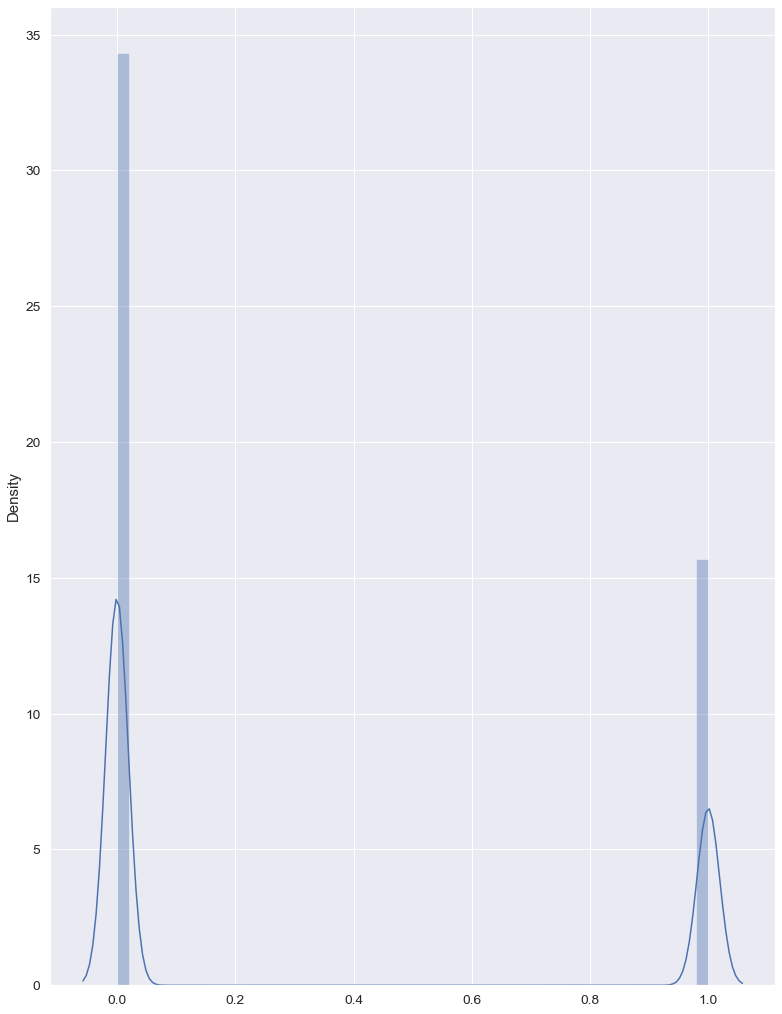

In [87]:
#df = df.drop('Country',axis=1)
sns.distplot(df.drop('Country',axis=1))

In [88]:
for i in df.columns:
    print("\nColumn Name:",i,"-->",df[i].unique(),"-->Unique Count",len(df[i].unique()))


Column Name: Fever --> [1 0] -->Unique Count 2

Column Name: Tiredness --> [1 0] -->Unique Count 2

Column Name: Dry-Cough --> [1 0] -->Unique Count 2

Column Name: Difficulty-in-Breathing --> [1 0] -->Unique Count 2

Column Name: Sore-Throat --> [1 0] -->Unique Count 2

Column Name: None_Sympton --> [0 1] -->Unique Count 2

Column Name: Pains --> [1 0] -->Unique Count 2

Column Name: Nasal-Congestion --> [1 0] -->Unique Count 2

Column Name: Runny-Nose --> [1 0] -->Unique Count 2

Column Name: Diarrhea --> [1 0] -->Unique Count 2

Column Name: None_Experiencing --> [0 1] -->Unique Count 2

Column Name: Age_0-9 --> [1 0] -->Unique Count 2

Column Name: Age_10-19 --> [0 1] -->Unique Count 2

Column Name: Age_20-24 --> [0 1] -->Unique Count 2

Column Name: Age_25-59 --> [0 1] -->Unique Count 2

Column Name: Age_60+ --> [0 1] -->Unique Count 2

Column Name: Gender_Female --> [0 1] -->Unique Count 2

Column Name: Gender_Male --> [1 0] -->Unique Count 2

Column Name: Gender_Transgender -->

In [89]:
# df

,Fever,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,Diarrhea,None_Experiencing,Age_0-9,Age_10-19,Age_20-24,Age_25-59,Age_60+,Gender_Female,Gender_Male,Gender_Transgender,Severity_Mild,Severity_Moderate,Severity_None,Severity_Severe,Contact_Dont-Know,Contact_No,Contact_Yes,Country
0,1,1,1,1,1,0,1,1,1,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,China
1,1,1,1,1,1,0,1,1,1,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,China
2,1,1,1,1,1,0,1,1,1,1,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,China
3,1,1,1,1,1,0,1,1,1,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,China
4,1,1,1,1,1,0,1,1,1,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,China
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
316795,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,Other
316796,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0,Other
316797,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,Other
316798,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,Other


In [90]:
severity_columns = df.filter(like='Severity_').columns
severity_columns

Index(['Severity_Mild', 'Severity_Moderate', 'Severity_None',
       'Severity_Severe'],
      dtype='object')

In [91]:
df['Severity_None'].replace({1:'None',0:'No'},inplace =True)
df['Severity_Mild'].replace({1:'Mild',0:'No'},inplace =True)
df['Severity_Moderate'].replace({1:'Moderate',0:'No'},inplace =True)
df['Severity_Severe'].replace({1:'Severe',0:'No'},inplace =True)
# df

In [92]:
df['Condition']=df[severity_columns].values.tolist()
# df

In [93]:
def removing(list1):
    list1 = set(list1) 
    list1.discard("No")
    a = ''.join(list1)
    return a

In [94]:
df['Condition'] = df['Condition'].apply(removing)
df

,Fever,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,Diarrhea,None_Experiencing,Age_0-9,Age_10-19,Age_20-24,Age_25-59,Age_60+,Gender_Female,Gender_Male,Gender_Transgender,Severity_Mild,Severity_Moderate,Severity_None,Severity_Severe,Contact_Dont-Know,Contact_No,Contact_Yes,Country,Condition
0,1,1,1,1,1,0,1,1,1,1,0,1,0,0,0,0,0,1,0,Mild,No,No,No,0,0,1,China,Mild
1,1,1,1,1,1,0,1,1,1,1,0,1,0,0,0,0,0,1,0,Mild,No,No,No,0,1,0,China,Mild
2,1,1,1,1,1,0,1,1,1,1,0,1,0,0,0,0,0,1,0,Mild,No,No,No,1,0,0,China,Mild
3,1,1,1,1,1,0,1,1,1,1,0,1,0,0,0,0,0,1,0,No,Moderate,No,No,0,0,1,China,Moderate
4,1,1,1,1,1,0,1,1,1,1,0,1,0,0,0,0,0,1,0,No,Moderate,No,No,0,1,0,China,Moderate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
316795,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,No,No,No,Severe,0,1,0,Other,Severe
316796,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,No,No,No,Severe,1,0,0,Other,Severe
316797,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,No,No,None,No,0,0,1,Other,None
316798,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,No,No,None,No,0,1,0,Other,None


## `Grouping by severity`

In [95]:
age_columns = df.filter(like='Age_').columns
gender_columns = df.filter(like='Gender_').columns
contact_columns = df.filter(like='Contact_').columns

In [96]:
No_risk_age = df.groupby(['Severity_None'])[age_columns].sum()
No_risk_gender = df.groupby(['Severity_None'])[gender_columns].sum()
No_risk_contact = df.groupby(['Severity_None'])[contact_columns].sum()

In [97]:
Low_risk_age = df.groupby(['Severity_Mild'])[age_columns].sum()
Low_risk_gender = df.groupby(['Severity_Mild'])[gender_columns].sum()
Low_risk_contact = df.groupby(['Severity_Mild'])[contact_columns].sum()

In [98]:
Moderate_risk_age = df.groupby(['Severity_Moderate'])[age_columns].sum()
Moderate_risk_gender = df.groupby(['Severity_Moderate'])[gender_columns].sum()
Moderate_risk_contact = df.groupby(['Severity_Moderate'])[contact_columns].sum()

In [99]:
Severe_risk_age = df.groupby(['Severity_Severe'])[age_columns].sum()
Severe_risk_gender = df.groupby(['Severity_Severe'])[gender_columns].sum()
Severe_risk_contact = df.groupby(['Severity_Severe'])[contact_columns].sum()

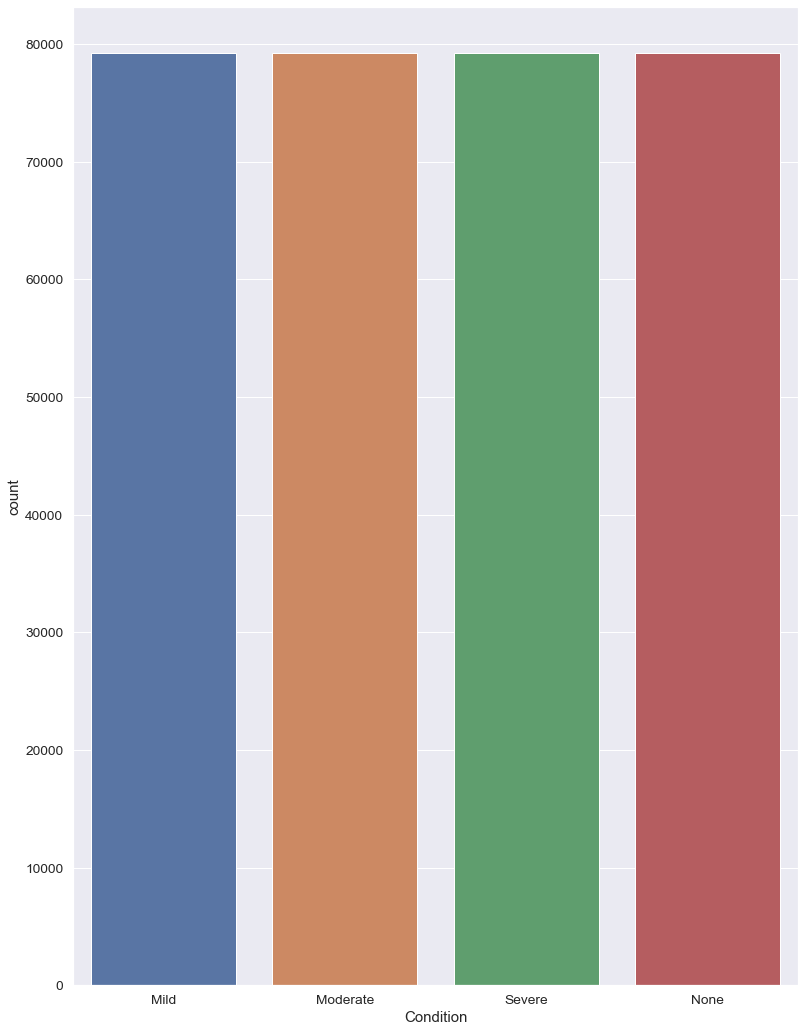

In [100]:
sns.countplot(df['Condition'])

# Preprocessing

In [101]:
df.drop("Country",axis=1,inplace=True)

In [102]:
df.drop(severity_columns,axis=1,inplace=True)

In [103]:
df['Symptoms_Score'] = df.iloc[:,:5].sum(axis=1) + df.iloc[:,6:10].sum(axis=1)

In [104]:
df.shape

(316800, 24)

In [105]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df['Condition'] = le.fit_transform(df['Condition'])

In [106]:
df

,Fever,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,Diarrhea,None_Experiencing,Age_0-9,Age_10-19,Age_20-24,Age_25-59,Age_60+,Gender_Female,Gender_Male,Gender_Transgender,Contact_Dont-Know,Contact_No,Contact_Yes,Condition,Symptoms_Score
0,1,1,1,1,1,0,1,1,1,1,0,1,0,0,0,0,0,1,0,0,0,1,0,9
1,1,1,1,1,1,0,1,1,1,1,0,1,0,0,0,0,0,1,0,0,1,0,0,9
2,1,1,1,1,1,0,1,1,1,1,0,1,0,0,0,0,0,1,0,1,0,0,0,9
3,1,1,1,1,1,0,1,1,1,1,0,1,0,0,0,0,0,1,0,0,0,1,1,9
4,1,1,1,1,1,0,1,1,1,1,0,1,0,0,0,0,0,1,0,0,1,0,1,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
316795,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,3,0
316796,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,3,0
316797,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,2,0
316798,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,2,0


# Feature Engineering

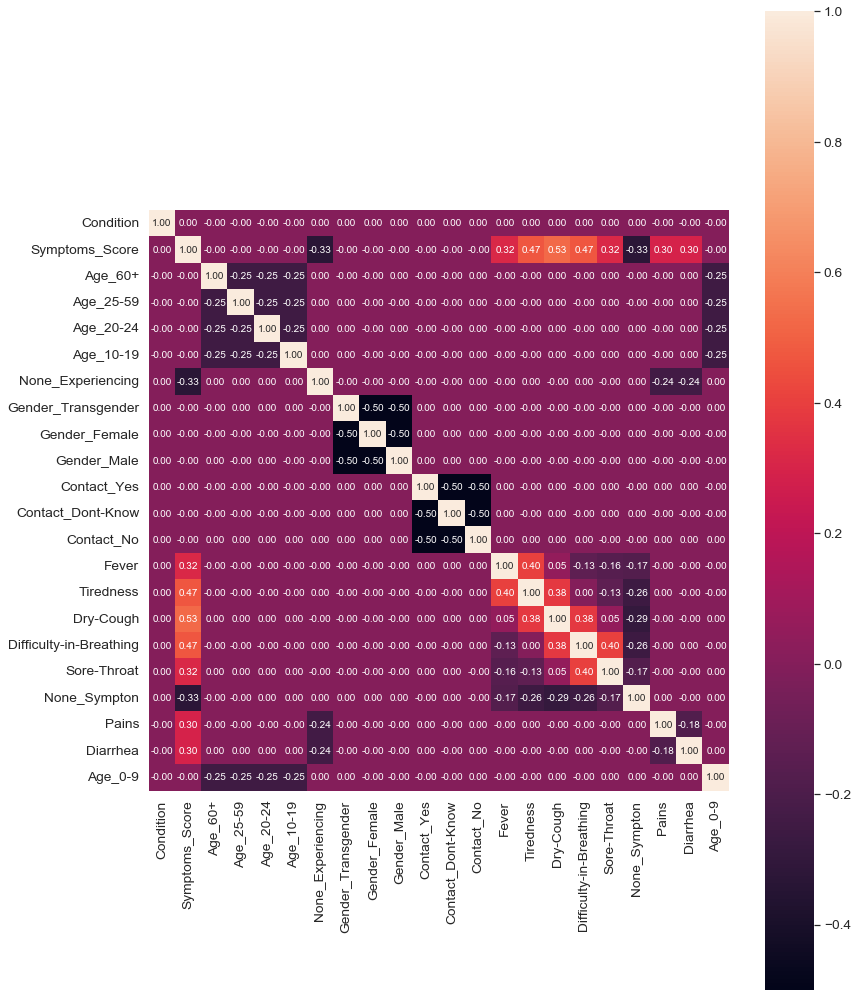

In [107]:
from pylab import rcParams
rcParams['figure.figsize'] = 13, 18
corrmat = df.corr()
k = 22
cols = corrmat.nlargest(k, 'Condition')['Condition'].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

# Model

In [108]:
X= df.drop(['Condition'],axis=1)
y= df['Condition']
df['Condition']

0         0
1         0
2         0
3         1
4         1
         ..
316795    3
316796    3
316797    2
316798    2
316799    2
Name: Condition, Length: 316800, dtype: int32

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

- Random Forest

In [36]:
'''from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'n_estimators': [100, 200, 300, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)'''

"from sklearn.ensemble import RandomForestClassifier\nfrom sklearn.model_selection import GridSearchCV\n# Create the parameter grid based on the results of random search \nparam_grid = {\n    'n_estimators': [100, 200, 300, 500],\n    'max_features': ['auto', 'sqrt', 'log2'],\n    'max_depth' : [4,5,6,7,8],\n    'criterion' :['gini', 'entropy']\n}\n# Create a based model\nrf = RandomForestClassifier()\n# Instantiate the grid search model\ngrid_search = GridSearchCV(estimator = rf, param_grid = param_grid, \n                          cv = 3, n_jobs = -1, verbose = 2)"

In [37]:
'''# Fit the grid search to the data
grid_search.fit(X_train, y_train)'''

'# Fit the grid search to the data\ngrid_search.fit(X_train, y_train)'

In [38]:
'''print('Best Parameters',grid_search.best_params_)
best_grid = grid_search.best_estimator_
print('\n Best Estimator',best_grid)'''

"print('Best Parameters',grid_search.best_params_)\nbest_grid = grid_search.best_estimator_\nprint('\n Best Estimator',best_grid)"

In [39]:
"""Best Parameters {'criterion': 'gini', 'max_depth': 4, 'max_features': 'sqrt', 'n_estimators': 100}
Best Estimator RandomForestClassifier(max_depth=4, max_features='sqrt')"""

"Best Parameters {'criterion': 'gini', 'max_depth': 4, 'max_features': 'sqrt', 'n_estimators': 100}\nBest Estimator RandomForestClassifier(max_depth=4, max_features='sqrt')"

In [40]:
from sklearn.ensemble import RandomForestClassifier
rfc1=RandomForestClassifier(criterion= 'gini', max_depth= 4, max_features= 'sqrt', n_estimators= 100)

In [41]:
rfc1.fit(X_train, y_train)

RandomForestClassifier(max_depth=4, max_features='sqrt')

In [119]:
sample_single_text=X_test[:1]
sample_single_text

,Fever,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,Diarrhea,None_Experiencing,Age_0-9,Age_10-19,Age_20-24,Age_25-59,Age_60+,Gender_Female,Gender_Male,Gender_Transgender,Contact_Dont-Know,Contact_No,Contact_Yes,Symptoms_Score
277936,0,0,1,1,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,4


In [122]:
pred=rfc1.predict(X_test)
# pred=rfc1.predict(sample_single_text)
y_test

277936    1
193502    0
92446     2
117607    3
240924    0
         ..
122340    0
151370    0
288434    0
1619      2
68501     1
Name: Condition, Length: 63360, dtype: int32

In [123]:
pred

array([3, 3, 3, ..., 3, 3, 3])

In [44]:
from sklearn.metrics import accuracy_score
print("Accuracy for Random Forest on CV data: ",accuracy_score(y_test,pred))

Accuracy for Random Forest on CV data:  0.22970328282828284


In [45]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,pred)

array([[2044, 2047, 5020, 6864],
       [2323, 1822, 5021, 6743],
       [2355, 2144, 4554, 6704],
       [2377, 2051, 5157, 6134]], dtype=int64)

- Catboost

In [46]:
!pip install catboost

In [47]:
from catboost import CatBoostClassifier

In [48]:
model = CatBoostClassifier(iterations=200)

In [49]:
categorical_var = np.where(X_train.dtypes != np.float)[0]
print('\nCategorical Variables indices : ',categorical_var)


Categorical Variables indices :  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22]


In [50]:
model.fit(X_train,y_train,cat_features = categorical_var,plot=False)

Learning rate set to 0.408837
0:	learn: 1.3862142	total: 986ms	remaining: 3m 16s
1:	learn: 1.3861638	total: 1.67s	remaining: 2m 44s
2:	learn: 1.3861440	total: 2.58s	remaining: 2m 49s
3:	learn: 1.3861000	total: 3.29s	remaining: 2m 41s
4:	learn: 1.3860046	total: 4.06s	remaining: 2m 38s
5:	learn: 1.3859796	total: 4.64s	remaining: 2m 30s
6:	learn: 1.3859552	total: 5.17s	remaining: 2m 22s
7:	learn: 1.3859276	total: 5.71s	remaining: 2m 16s
8:	learn: 1.3858819	total: 6.19s	remaining: 2m 11s
9:	learn: 1.3858448	total: 6.9s	remaining: 2m 11s
10:	learn: 1.3857902	total: 7.6s	remaining: 2m 10s
11:	learn: 1.3857512	total: 8.24s	remaining: 2m 9s
12:	learn: 1.3857010	total: 8.97s	remaining: 2m 9s
13:	learn: 1.3856820	total: 9.65s	remaining: 2m 8s
14:	learn: 1.3856065	total: 10.3s	remaining: 2m 6s
15:	learn: 1.3855559	total: 10.9s	remaining: 2m 5s
16:	learn: 1.3855393	total: 11.5s	remaining: 2m 3s
17:	learn: 1.3855137	total: 12s	remaining: 2m 1s
18:	learn: 1.3855013	total: 12.6s	remaining: 1m 59s
19:

158:	learn: 1.3792896	total: 1m 32s	remaining: 23.8s
159:	learn: 1.3792620	total: 1m 32s	remaining: 23.2s
160:	learn: 1.3792354	total: 1m 33s	remaining: 22.6s
161:	learn: 1.3791905	total: 1m 33s	remaining: 22s
162:	learn: 1.3791393	total: 1m 34s	remaining: 21.4s
163:	learn: 1.3791092	total: 1m 34s	remaining: 20.8s
164:	learn: 1.3790851	total: 1m 35s	remaining: 20.2s
165:	learn: 1.3790728	total: 1m 35s	remaining: 19.6s
166:	learn: 1.3790363	total: 1m 36s	remaining: 19s
167:	learn: 1.3790136	total: 1m 36s	remaining: 18.4s
168:	learn: 1.3790016	total: 1m 37s	remaining: 17.8s
169:	learn: 1.3789624	total: 1m 37s	remaining: 17.2s
170:	learn: 1.3789330	total: 1m 37s	remaining: 16.6s
171:	learn: 1.3789250	total: 1m 38s	remaining: 16s
172:	learn: 1.3789018	total: 1m 38s	remaining: 15.4s
173:	learn: 1.3788807	total: 1m 39s	remaining: 14.8s
174:	learn: 1.3788512	total: 1m 39s	remaining: 14.3s
175:	learn: 1.3787835	total: 1m 40s	remaining: 13.7s
176:	learn: 1.3787525	total: 1m 40s	remaining: 13.1s

In [51]:
predict_train = model.predict(X_train)
print('\nTarget on train data',predict_train)


Target on train data [[3]
 [3]
 [3]
 ...
 [3]
 [3]
 [3]]


In [52]:
accuracy_train = accuracy_score(y_train,predict_train)
print('\naccuracy_score on train dataset : ', accuracy_train)


accuracy_score on train dataset :  0.26465041035353537


In [53]:
predict_test = model.predict(X_test)
print('\nTarget on test data',predict_test) 

# Accuracy Score on test dataset
accuracy_test = accuracy_score(y_test,predict_test)
print('\naccuracy_score on test dataset : ', accuracy_test)


Target on test data [[3]
 [3]
 [3]
 ...
 [1]
 [3]
 [3]]

accuracy_score on test dataset :  0.19139835858585857


- Logistic Regression

In [54]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver = 'lbfgs')
model.fit(X_train, y_train)

LogisticRegression()

In [55]:
# use the model to make predictions with the test data
y_pred = model.predict(X_test)

In [56]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.2401199494949495

In [57]:
'''from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=23)
knn.fit(X_train, y_train)'''

'from sklearn.neighbors import KNeighborsClassifier\n\nknn = KNeighborsClassifier(n_neighbors=23)\nknn.fit(X_train, y_train)'

In [58]:
'''y_pred_knn = knn.predict(X_test)'''

'y_pred_knn = knn.predict(X_test)'

In [59]:
'''from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred_knn)'''

'from sklearn.metrics import accuracy_score\naccuracy_score(y_test,y_pred_knn)'

In [60]:
'''from sklearn.svm import SVC

svm = SVC(kernel='linear',C=0.025, random_state=101)

svm.fit(X_train, y_train)'''

"from sklearn.svm import SVC\n\nsvm = SVC(kernel='linear',C=0.025, random_state=101)\n\nsvm.fit(X_train, y_train)"

In [61]:
'''y_pred_svc = svc.predict(X_test)'''

'y_pred_svc = svc.predict(X_test)'

In [62]:
'''from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred_svc)'''

'from sklearn.metrics import accuracy_score\naccuracy_score(y_test,y_pred_svc)'

In [63]:
from sklearn.naive_bayes import MultinomialNB

mb = MultinomialNB()

mb.fit(X_train, y_train)

MultinomialNB()

In [64]:
y_pred_mb = mb.predict(X_test)

In [65]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred_mb)

0.24141414141414141

- Neural network

In [66]:
from keras.utils.np_utils import to_categorical
y_train = to_categorical(y_train, num_classes = 4)
y_train.shape

(253440, 4)

In [67]:
from keras.layers import Input,InputLayer, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D
from keras.layers import AveragePooling2D, MaxPooling2D, Dropout
from keras.models import Sequential,Model
from keras.optimizers import SGD
from keras.callbacks import ModelCheckpoint,LearningRateScheduler
import keras
from keras import backend as K

In [68]:
model=keras.models.Sequential()
#model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128,activation='relu'))
model.add(keras.layers.Dense(128,activation='relu'))
model.add(keras.layers.Dense(128,activation='relu'))
model.add(keras.layers.Dense(128,activation='relu'))
model.add(keras.layers.Dense(128,activation='relu'))
model.add(keras.layers.Dense(4,activation='softmax'))

In [69]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
                   
model.fit(X_train, y_train,epochs=10, batch_size=32, verbose=1)

Epoch 1/10
7920/7920 [==============================] - 14s 2ms/step - loss: 1.3866 - accuracy: 0.2486
Epoch 2/10
7920/7920 [==============================] - 14s 2ms/step - loss: 1.3864 - accuracy: 0.2504
Epoch 3/10
7920/7920 [==============================] - 13s 2ms/step - loss: 1.3864 - accuracy: 0.2503
Epoch 4/10
7920/7920 [==============================] - 15s 2ms/step - loss: 1.3864 - accuracy: 0.2497
Epoch 5/10
7920/7920 [==============================] - 14s 2ms/step - loss: 1.3864 - accuracy: 0.2484
Epoch 6/10
7920/7920 [==============================] - 16s 2ms/step - loss: 1.3864 - accuracy: 0.2509
Epoch 7/10
7920/7920 [==============================] - 15s 2ms/step - loss: 1.3864 - accuracy: 0.2500
Epoch 8/10
7920/7920 [==============================] - 14s 2ms/step - loss: 1.3863 - accuracy: 0.2502
Epoch 9/10
7920/7920 [==============================] - 14s 2ms/step - loss: 1.3864 - accuracy: 0.2490
Epoch 10/10
7920/7920 [==============================] - 13s 2ms/step - l

In [70]:
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred,axis=1)

In [71]:
y_pred

array([3, 3, 3, ..., 3, 3, 3], dtype=int64)